In [2]:
#mount google drive
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

%cd gdrive/MyDrive/CS449Project

Mounted at /content/gdrive/
/content/gdrive/.shortcut-targets-by-id/1jFmtu6VS9j4_8QNgIiekCUMOkuw8r7G6/CS449Project


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.image as img

###### Note: Used this [YouTube video](https://www.youtube.com/watch?v=il8dMDlXrIE) as a source.

### Section 1: Initialize / Load in Data

This section loads in and preprocesses training and testing data of real landscape images, as well as the generated images that we will be classifying. The real landscape images have been downsized to 32x32, so that the generated images and real images are the same size. 

In [ ]:
#resize training portion of real landscape images (4000 images, 800 of each class)
transform = transforms.Compose([transforms.Resize((32,32)),transforms.ToTensor(), transforms.Lambda(torch.flatten)])
images = datasets.ImageFolder('data/train_folder/', transform)

# insert images into array so can train
Xtrain, Ytrain = [],[]
for i in range(len(images)):
  if i%100==0:
    print(i)
  Xtrain.append((images[i][0]).numpy())
  Ytrain.append(images[i][1])

In [4]:
#resize testing portion of real landscape images (500 images, 100 of each class)
images2 = datasets.ImageFolder('data/test_folder/', transform)

# insert images into array so can train
Xtest, Ytest = [],[]
for i in range(len(images2)):
  Xtest.append((images2[i][0]).numpy())
  Ytest.append(images2[i][1])

In [5]:
## LOAD IN GENERATED IMAGES  (150 images in this section, 30 per class). 
images3 = datasets.ImageFolder('results_conditional_150/FinalResults', transform)

Xgen,Ygen = [], []
for i in range(len(images3)):
  Xgen.append((images3[i][0]).numpy())
  Ygen.append(images3[i][1])

In [10]:
## LOAD IN GENERATED IMAGES from diffusion model w/ modified noise schedule  (150 images in this section, 30 per class). 
images4 = datasets.ImageFolder('results_500diffSteps/FinalResults', transform)

Xgen2,Ygen2 = [], []
for i in range(len(images4)):
  Xgen2.append((images4[i][0]).numpy())
  Ygen2.append(images4[i][1])


This section loads in the data in another way in a format such that we can display the images. 

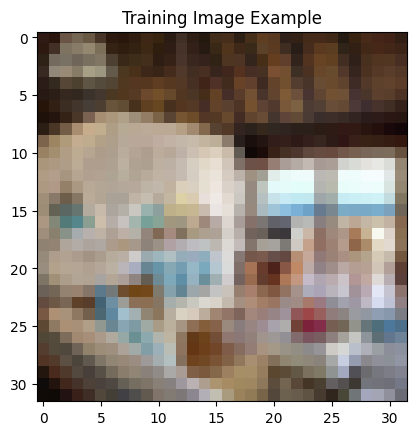

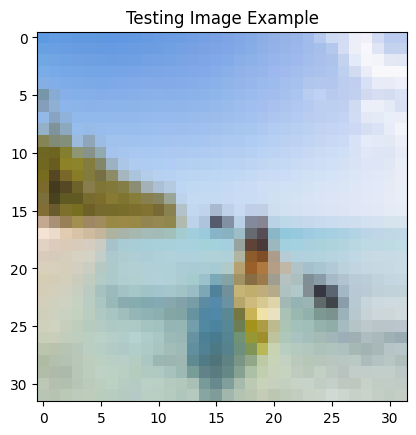

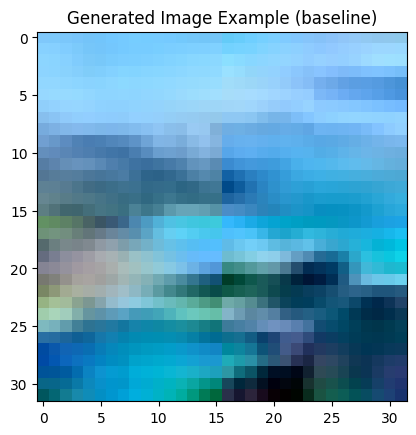

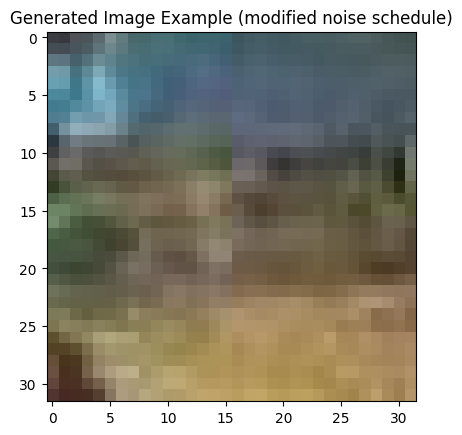

In [11]:
#resize training portion of real landscape images (4000 images, 800 of each class)
displayTransform = transforms.Compose([transforms.Resize((32,32)),transforms.ToTensor()])
showImage1 = datasets.ImageFolder('data/train_folder/', displayTransform)
showImage2 = datasets.ImageFolder('data/test_folder/', displayTransform)
showImage3 = datasets.ImageFolder('results_conditional_150/FinalResults', displayTransform)
showImage4 = datasets.ImageFolder('results_500diffSteps/FinalResults', displayTransform)


plt.imshow(np.transpose(np.array(showImage1[10][0]), (1,2,0)))
plt.title('Training Image Example')
plt.show()

plt.imshow(np.transpose(np.array(showImage2[10][0]), (1,2,0)))
plt.title('Testing Image Example')
plt.show()

plt.imshow(np.transpose(np.array(showImage3[10][0]), (1,2,0)))
plt.title('Generated Image Example (baseline)')
plt.show()

plt.imshow(np.transpose(np.array(showImage4[10][0]), (1,2,0)))
plt.title('Generated Image Example (modified noise schedule)')
plt.show()

### Section 2: Train + Test Model on Real Landscape Images

This section trains and tests the SVC model (Support Vector Classifier) using the respective data. This is in order to give a baseline of how good the classifier can be at differentiating classes given *real* images.

In [ ]:
#initialize model, and train model on training data (4000 images, 800 per class)
classifier = SVC()
classifier.fit(Xtrain, Ytrain)

#determine training accuracy of model
prediction = classifier.predict(Xtrain)
acc = accuracy_score(Ytrain,prediction)

#determine testing accuracy of model (500 images, 100 per class)
prediction2 = classifier.predict(Xtest)
acc2 = accuracy_score(Ytest, prediction2)

In [ ]:
print(acc)
print(acc2)

0.81875
0.66


Playing around with hyperparameters to improve performance: 

In [ ]:
#initialize model, and train model on training data (4000 images, 800 per class)
classifier = SVC(C=10)
classifier.fit(Xtrain, Ytrain)

SVC(C=10)

In [ ]:
#determine training accuracy of model
prediction = classifier.predict(Xtrain)
acc = accuracy_score(Ytrain,prediction)
acc

0.99325

In [ ]:
#determine testing accuracy of model (500 images, 100 per class)
prediction2 = classifier.predict(Xtest)
acc2 = accuracy_score(Ytest, prediction2)
acc2

0.666

The training accuracy was quite high for the model, reaching 99.3%. However, it is likely overfitting, since the testing accuracy was significantly lower--  only 66.6%. The next step is to try and decrease this overfitting. 

SVC w/ regularization = 100

In [ ]:
#initialize model, and train model on data
classifier = SVC(C=100)
classifier.fit(Xtrain, Ytrain)

#determine training accuracy of model
prediction = classifier.predict(Xtrain)
acc = accuracy_score(Ytrain,prediction)
acc

0.9995

In [ ]:
#determine testing accuracy of model (500 images, 100 per class)
prediction2 = classifier.predict(Xtest)
acc2 = accuracy_score(Ytest, prediction2)
acc2

0.67

SVC w/ regularization = 100, gamma = 0.001

In [ ]:
#initialize model, and train model on data
classifier = SVC(C=100, gamma = 0.001)
classifier.fit(Xtrain, Ytrain)

#determine training accuracy of model
prediction = classifier.predict(Xtrain)
acc = accuracy_score(Ytrain,prediction)
print(acc)

#determine testing accuracy of model (500 images, 100 per class)
prediction2 = classifier.predict(Xtest)
acc2 = accuracy_score(Ytest, prediction2)
print(acc2)

0.9915
0.65


SVC w/ regularization = 100, gamma = 0.0

In [ ]:
#initialize model, and train model on data
classifier = SVC(C=100, gamma = 0.01)
classifier.fit(Xtrain, Ytrain)

#determine training accuracy of model
prediction = classifier.predict(Xtrain)
acc = accuracy_score(Ytrain,prediction)
print(acc)

#determine testing accuracy of model (500 images, 100 per class)
prediction2 = classifier.predict(Xtest)
acc2 = accuracy_score(Ytest, prediction2)
print(acc2)

0.9995
0.676


SVC w/ regularization = 100, gamma = 0.1

In [ ]:
#initialize model, and train model on data
classifier = SVC(C=100, gamma = 0.1)
classifier.fit(Xtrain, Ytrain)

#determine training accuracy of model
prediction = classifier.predict(Xtrain)
acc = accuracy_score(Ytrain,prediction)
print(acc)

#determine testing accuracy of model (500 images, 100 per class)
prediction2 = classifier.predict(Xtest)
acc2 = accuracy_score(Ytest, prediction2)
print(acc2)

0.9995
0.36


The hyperparameters with the best testing error are regularization = 100, gamma = 0.01, at 67% testing accuracy. It's not much better than the original, but we can use this model when testing the performance of our diffusion model. Ideally, we would want this model to perform at least as well as it did on the testing dataset of real landscape images. 

### Section 3: Testing on Generated Images (Baseline Diffusion Model)

This section tests the performance of the GAN model on the generated images. 


First, we train the best model. 

In [15]:
#initialize model, and train model on data
classifier = SVC(C=100, gamma = 0.01)
classifier.fit(Xtrain, Ytrain)

#determine training accuracy of model
prediction = classifier.predict(Xtrain)
acc = accuracy_score(Ytrain,prediction)
print(acc)

#determine testing accuracy of model (500 images, 100 per class)
prediction2 = classifier.predict(Xtest)
acc2 = accuracy_score(Ytest, prediction2)
print(acc2)

0.9995
0.676


In [16]:
GANpredict=  classifier.predict(Xgen)
acc3 = accuracy_score(Ygen,GANpredict)
print(acc3)

0.8397790055248618


The model seems to have generalized even better to our generated images than to the actual training set!  😺

Now we try again with a training set the same size as our generated images dataset to see if that is what made the difference. 

In [17]:
# randomly select 150 images from the original testing dataset 
import random

randIndices = random.sample(range(0,500), 150)
smallTestX = [Xtest[i] for i in randIndices]
smallTestY = [Ytest[i] for i in randIndices]

In [18]:
smallPredict = classifier.predict(smallTestX)
acc4 = accuracy_score(smallTestY,smallPredict)
print(acc4)

0.6866666666666666


Changing the testing dataset size so that it matches that of the generated images dataset does not impact the results. Thus, we can say that this model generalizes better to our generated images than the testing dataset! This is a surprising but exciting result. 

### Section 4: Testing on Generated Images (Modified Diffusion Model)

This section tests the performance of the GAN model on the generated images from the diffusion model with the modified noise schedule. 

In [19]:
GANpredict2=  classifier.predict(Xgen2)
acc4 = accuracy_score(Ygen2,GANpredict2)
print(acc4)

0.24861878453038674


The classifier performs much worse with images generated from diffusion model with a modified noise schedule. If we take a look at the images from various classes (below) , we can see that this makes sense -- the images don't correspond as clearly to their class as those from the baseline diffusion model.  

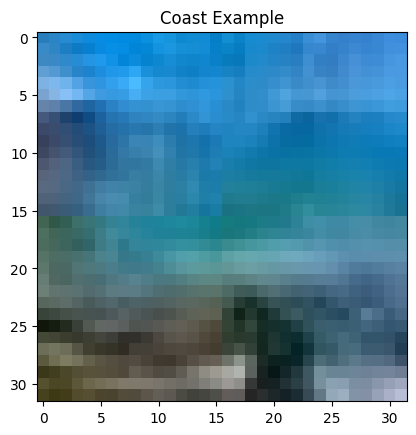

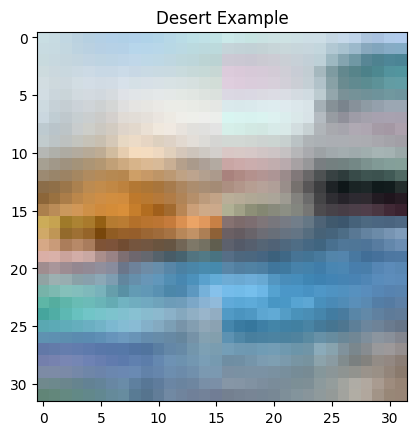

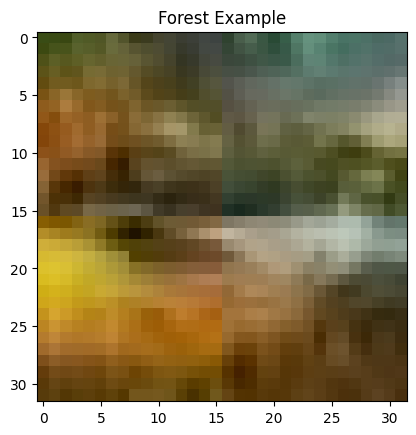

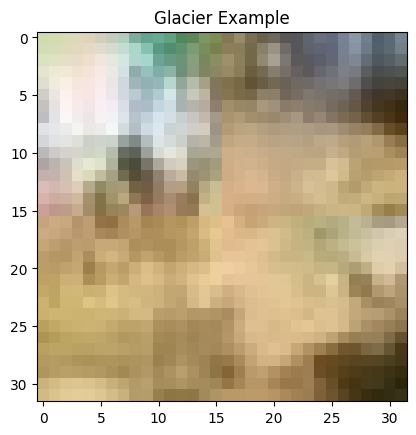

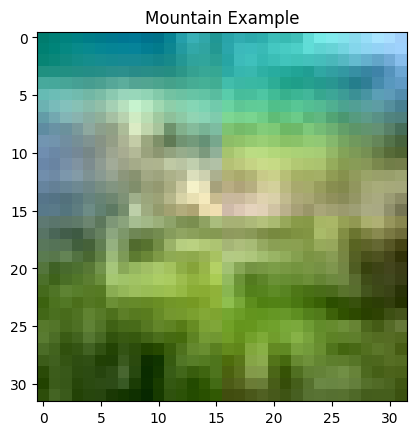

In [27]:
plt.imshow(np.transpose(np.array(showImage4[0][0]), (1,2,0)))
plt.title('Coast Example')
plt.show()

plt.imshow(np.transpose(np.array(showImage4[35][0]), (1,2,0)))
plt.title('Desert Example')
plt.show()

plt.imshow(np.transpose(np.array(showImage4[63][0]), (1,2,0)))
plt.title('Forest Example')
plt.show()

plt.imshow(np.transpose(np.array(showImage4[93][0]), (1,2,0)))
plt.title('Glacier Example')
plt.show()

plt.imshow(np.transpose(np.array(showImage4[120][0]), (1,2,0)))
plt.title('Mountain Example')
plt.show()

#### Analysis on Accuracy: Does the model perform better on some classes than others?

In [20]:
incorrectInd = np.array(prediction!=Ytrain)
incorrect = np.array(Ytrain)[incorrectInd]
unique, counts = np.unique(incorrect, return_counts=True)
print('Classes incorrectly classified + how many times (Training Dataset)')
print(unique, counts)

Classes incorrectly classified + how many times (Training Dataset)
[2] [2]


In [21]:
incorrectInd = np.array(prediction2!=Ytest)
incorrect = np.array(Ytest)[incorrectInd]
unique, counts = np.unique(incorrect, return_counts=True)
print('Classes incorrectly classified + how many times (Testing Dataset)')
print(unique, counts)

Classes incorrectly classified + how many times (Testing Dataset)
[0 1 2 3 4] [39 14 23 16 70]


In [22]:
incorrectInd = np.array(GANpredict!=Ygen)
incorrect = np.array(Ygen)[incorrectInd]
unique, counts = np.unique(incorrect, return_counts=True)
print('Classes incorrectly classified + how many times (Generated Images Dataset w/ baseline diffusion model)')
print(unique, counts)

Classes incorrectly classified + how many times (Generated Images Dataset w/ baseline diffusion model)
[0 2 4] [22  1  6]


In [23]:
incorrectInd = np.array(GANpredict2!=Ygen)
incorrect = np.array(Ygen)[incorrectInd]
unique, counts = np.unique(incorrect, return_counts=True)
print('Classes incorrectly classified + how many times (Generated Images Dataset w/ modified diffusion model)')
print(unique, counts)

Classes incorrectly classified + how many times (Generated Images Dataset w/ modified diffusion model)
[0 1 2 3 4] [30 28 25 22 31]


There seems to be little (if any) correlation between amount classified incorrectly and the classes those images are from.